# 중간고사
### 다변량통계분석
### 2016년 2학기


-	각 문항에 답을 하기 위해 사용된 그래프, 표, 통계량 등을 반드시 모두 제시하시오. 
-	각 문제에 대한 답안 파일과 문제를 해결하기 위해 사용한 R 스크립트 파일을 함께 제출하시오. 

In [3]:
library(psych)
library(ggplot2)
library(dplyr)


Attaching package: 'ggplot2'

The following objects are masked from 'package:psych':

    %+%, alpha


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



## 1.	Cereal.csv는 3개의 미국 시리얼 제조사(General Mills: G, Kellogg: K, Quaker: Q)에 의해 생산되는 아침식사용 시리얼 각 브랜드의 영양성분 자료이다. 

In [47]:
Cereal <- read.csv("cereal.csv", stringsAsFactors = F)
Cereal_s <- Cereal[,-1]
Cereal_s <- as.data.frame(Cereal_s)
rownames(Cereal_s) <- Cereal[,1]
Cereal_s <- rename(Cereal_s,Carbon=Carbonhydrates)
head(Cereal_s)

,Manufacturer,Calories,Protein,Fat,Sodium,Fiber,Carbon,Sugar,Potassium
ACCheerios,G,110,2,2,180,1.5,10.5,10,70
Cheerios,G,110,6,2,290,2,17,1,105
CocoaPuffs,G,110,1,1,180,0,12,13,55
CountChocula,G,110,1,1,180,0,12,13,65
GoldenGrahams,G,110,1,1,280,0,15,9,45
HoneyNutCheerios,G,110,3,1,250,1.5,11.5,10,90


 - A.	영양성분 상 특성을 시리얼 별로 한눈에 비교하기 위한 그래프를 그린 후 비슷한 영양성분을 가지는 시리얼들을 탐색적으로 구분하여 서술하시오.
  - 각 성분에 대해서 전반적으로 군집화를 한번에 시각적으로 보려면 지난 수업시간에 배운 HeatMap을 이용하여 구분이 가능합니다.
  - heatmap으로 분류된 각 시리얼 별로 각 성분을 직접적으로 비교 해보고 싶다면 Star 그래프를 활용하여 비교가능하다.

In [79]:
library(RColorBrewer)

In [87]:
matrix_Cereal <- as.matrix(Cereal_s[,-1])

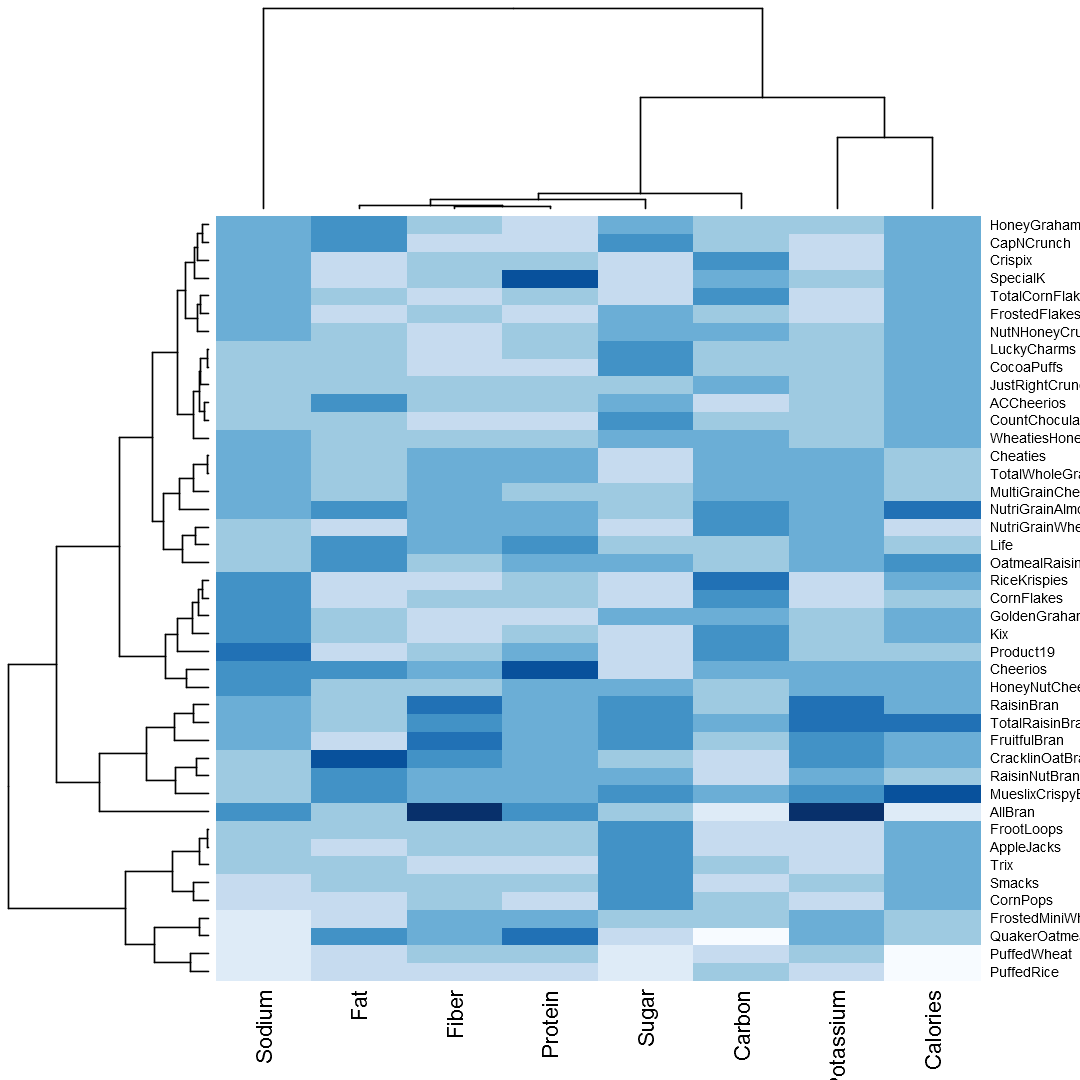

In [89]:
heatmap(matrix_Cereal, scale="column", col=brewer.pal(9,"Blues"))

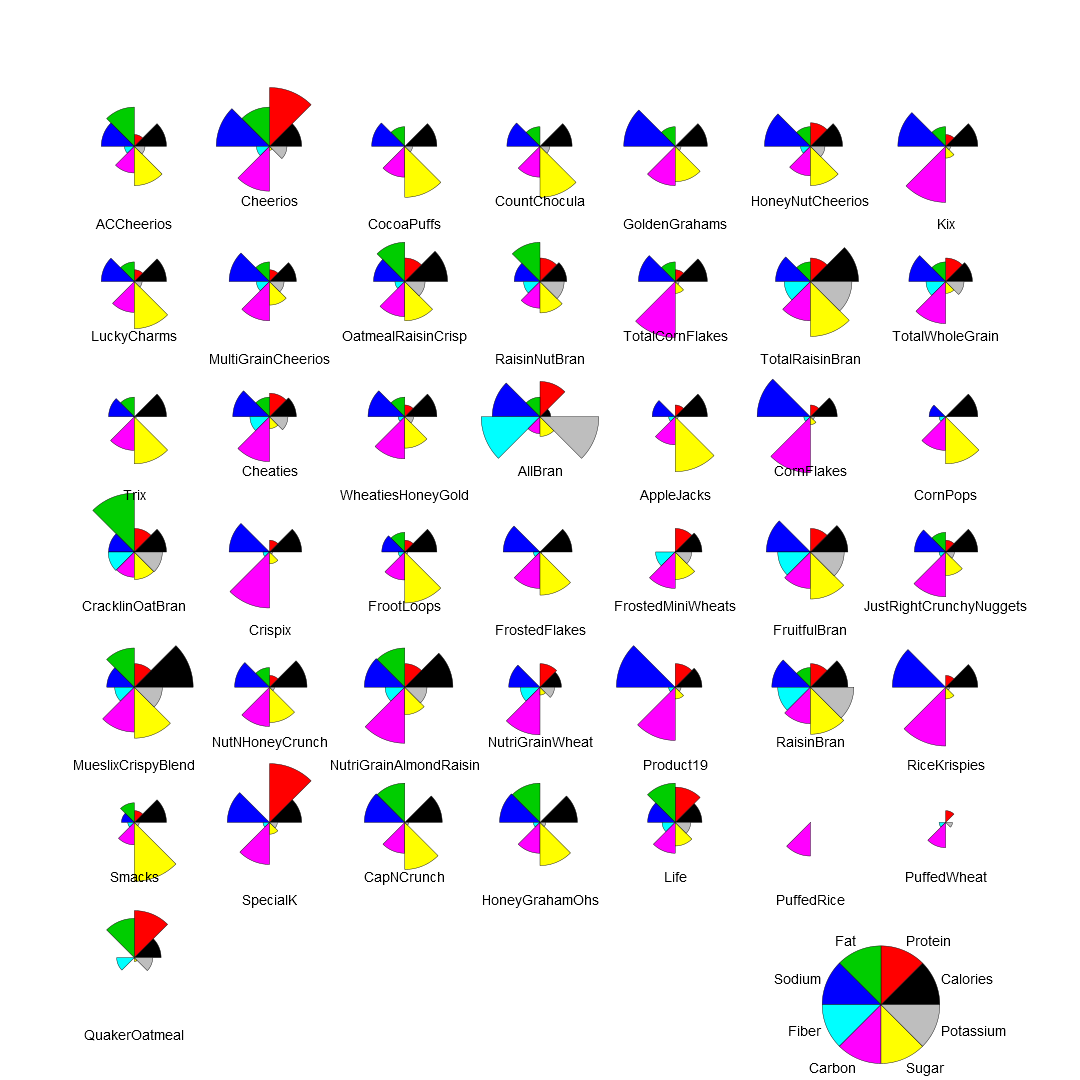

In [97]:
stars(Cereal_s[,-1],cex=0.7, key.loc=c(15,1.5),scale =T,draw.segments = TRUE)

 - B.	8개의 영양성분 상의 특성을 보다 적은 차원에서 설명하기 위해 주성분분석을 활용하여 분석을 진행하시오. 적절한 그래프와 결과물을 사용하여 아래의 문항에 답변하시오.

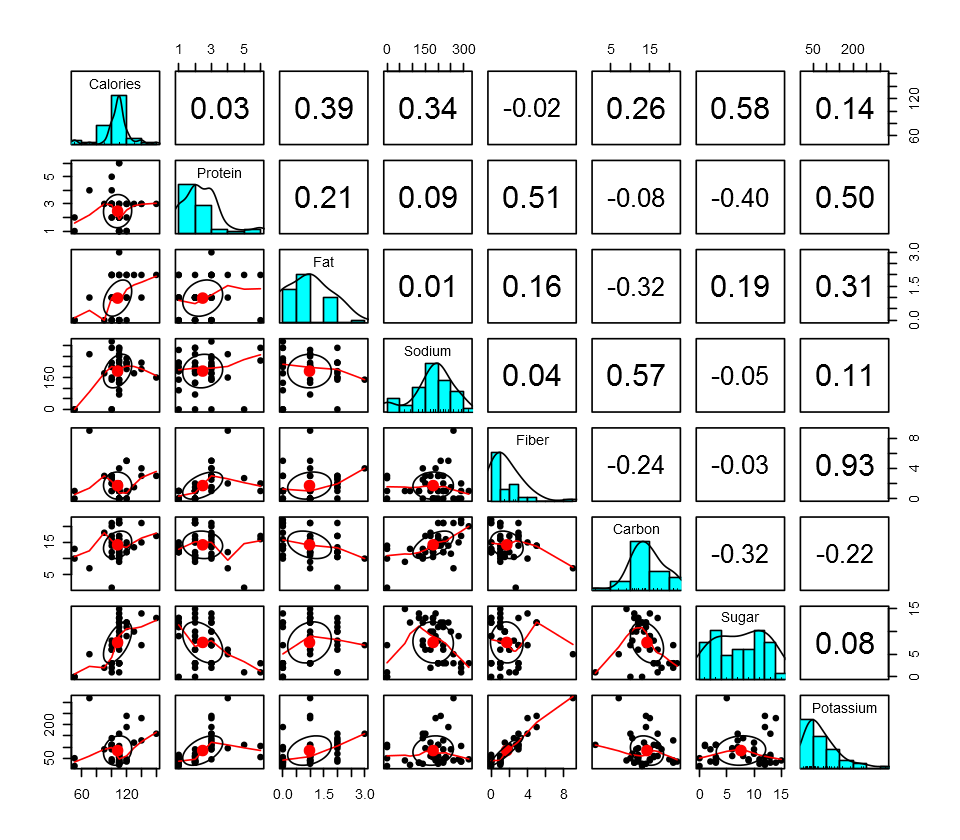

In [110]:
options(repr.plot.width=8, repr.plot.height=7)
pairs.panels(Cereal_s[,-1])

 - 이상치 제거 
  - AllBran

In [113]:
Cereal_s[Cereal_s$Fiber > 8, ]
which(Cereal_s$Fiber > 8)

,Manufacturer,Calories,Protein,Fat,Sodium,Fiber,Carbon,Sugar,Potassium
AllBran,K,70,4,1,260,9,7,5,320


[1] 18

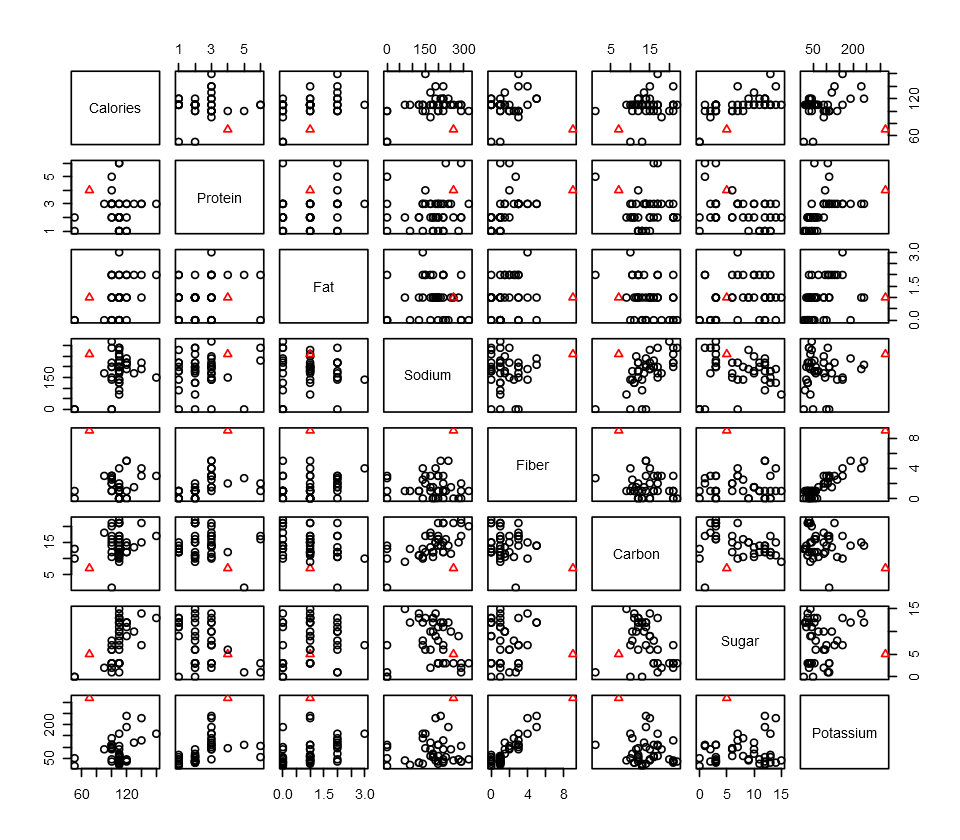

In [116]:
clr=rep(1,dim(Cereal_s)[1])
clr[18]=2
pairs(Cereal_s[,-1],col=clr,pch=clr)

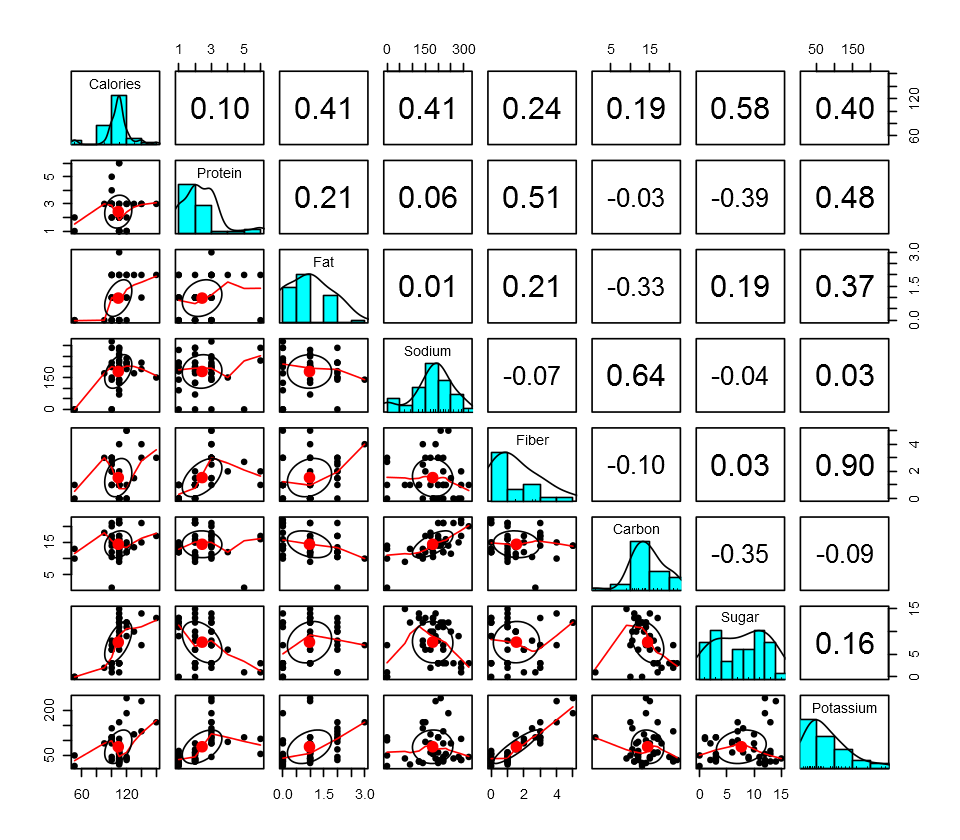

In [118]:
Cereal_s2<-Cereal_s[-18,] # 이상치 제거 
pairs.panels(Cereal_s2[,-1])   # cor: 0.62

- i.	적절한 주성분의 개수는 무엇인가? 
 - 설명 비중으로 결정 : PC3 ~ PC4 에서 결정 
 - Plot 을 통한 결정 : PC4에서 결정
 - 결론 : 총 4개의 주성분 선택 

In [119]:
pca = prcomp(Cereal_s2[,-1],scale=T)  # 상관계수로 주성분 분석을 한다. scale된 변수로 (평균0 표편1)
summary(pca)

Importance of components:
                          PC1    PC2    PC3    PC4     PC5     PC6     PC7
Standard deviation     1.6387 1.3641 1.3190 0.9205 0.65478 0.55086 0.28416
Proportion of Variance 0.3357 0.2326 0.2175 0.1059 0.05359 0.03793 0.01009
Cumulative Proportion  0.3357 0.5683 0.7857 0.8917 0.94524 0.98317 0.99327
                           PC8
Standard deviation     0.23208
Proportion of Variance 0.00673
Cumulative Proportion  1.00000

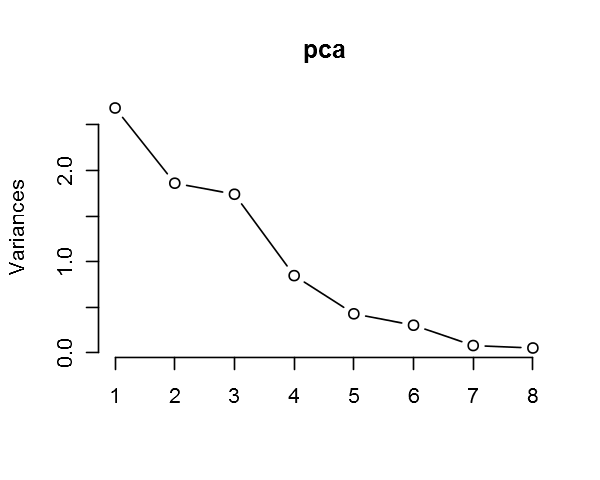

In [120]:
options(repr.plot.width=5,repr.plot.height=4)
plot(pca, type="l")

- ii.	각 주성분은 어떤 의미를 가지는가?

In [121]:
pca$rotation[,1:4]

,PC1,PC2,PC3,PC4
Calories,-0.37231191,0.25098988,0.47618243,-0.03742651
Protein,-0.3429565,0.1199301,-0.4673464,-0.2799579
Fat,-0.3609781,-0.1483306,0.1738657,-0.7439133
Sodium,-0.04842664,0.63602689,0.18742101,-0.15951919
Fiber,-0.50633768,-0.01448029,-0.26109309,0.39899184
Carbon,0.11309548,0.67014027,-0.03209373,0.14894412
Sugar,-0.1734235,-0.2157501,0.6358641,0.2972210
Potassium,-0.55845342,0.01558593,-0.12632918,0.26767553


In [122]:
rotation <- as.data.frame(pca$rotation[,1:4])
rotation

,PC1,PC2,PC3,PC4
Calories,-0.37231191,0.25098988,0.47618243,-0.03742651
Protein,-0.3429565,0.1199301,-0.4673464,-0.2799579
Fat,-0.3609781,-0.1483306,0.1738657,-0.7439133
Sodium,-0.04842664,0.63602689,0.18742101,-0.15951919
Fiber,-0.50633768,-0.01448029,-0.26109309,0.39899184
Carbon,0.11309548,0.67014027,-0.03209373,0.14894412
Sugar,-0.1734235,-0.2157501,0.6358641,0.2972210
Potassium,-0.55845342,0.01558593,-0.12632918,0.26767553


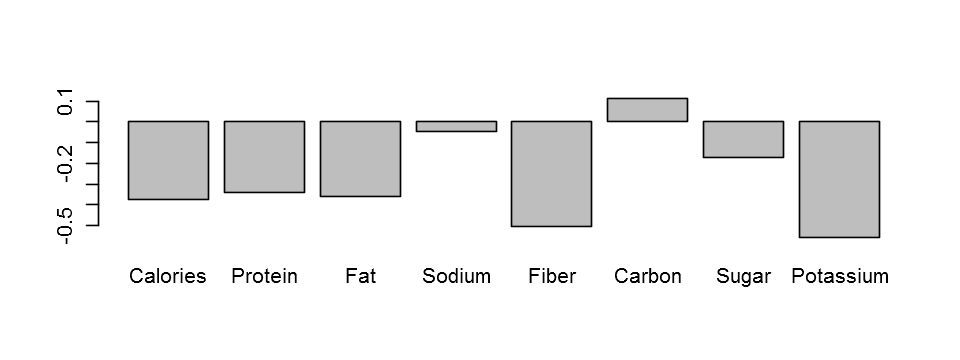

In [123]:
options(repr.plot.width=8,repr.plot.height=3)
par(mfrow=c(1,1))
barplot(pca$rotation[,1]) 
# 주성분 PC1은 칼로리,단백질, 지방, 섬유소, 칼륨을 기준으로 분류를 한다. 
# 칼로리, 단백질, 지방, 섬유소, 칼륨과는 강한 음의 관계를 가지고 설탕과는 약한 음의 관계를 가진다. 
# 반면 탄수화물과는 약한 양의 관계를 가진다. 

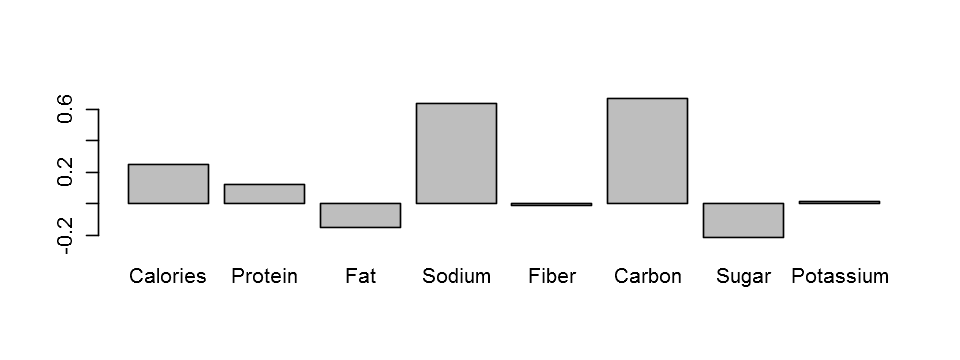

In [124]:
barplot(pca$rotation[,2]) 
# 나트륨, 탄수화물과 강한 관계를 가지며 양의 관계를 가지고 있다. 
# 칼로리, 단백질과도 관계는 있지만 약한 관계이며 또한 양의 관계를 가지고 있다. 
# 지방과 설탕는 적은 관계와 음의 관계를 가진다.

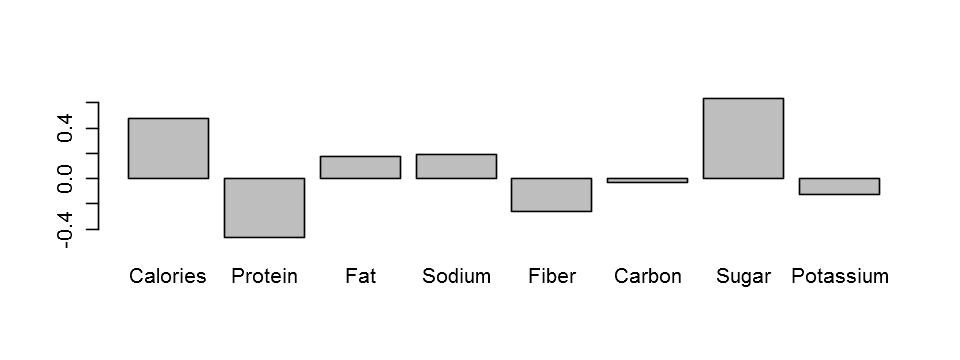

In [125]:
barplot(pca$rotation[,3])
# 칼로리와 설탕에 강한 관계와 양의 관계를 가진다.
# 하지만 단백질과는 강한 음의 관계를 가진다. 

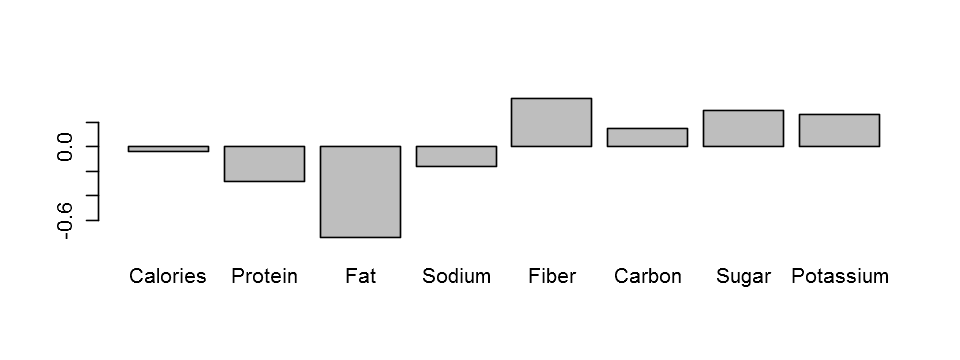

In [127]:
barplot(pca$rotation[,4])
# 지방과 강한 음의 관계를 가지고 있다.
# 단백질과는 약한 음의 관계를 가지고, 섬유소와는 강한 양의 관계를 설탕, 탄수화물, 칼륨과는 약 양의 관계를 가진다. 

In [129]:
describe(Cereal_s2[,-1])

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
Calories,1.0000000,42.0000000,108.8095238,18.2399162,110.0000000,109.1176471,7.4130000,50.0000000,160.0000000,110.0000000,-0.8169404,4.1292486,2.8144802
Protein,2.0000000,42.0000000,2.4285714,1.2125936,2.0000000,2.2647059,1.4826000,1.0000000,6.0000000,5.0000000,1.1642334,1.5667908,0.1871073
Fat,3.0000000,42.0000000,0.9761905,0.8111448,1.0000000,0.9411765,1.4826000,0.0000000,3.0000000,3.0000000,0.3090496,-0.8237883,0.1251624
Sodium,4.0000000,42.0000000,178.5714286,79.1824515,190.0000000,185.5882353,59.3040000,0.0000000,320.0000000,320.0000000,-0.7455562,0.2516578,12.2181175
Fiber,5.0000000,42.0000000,1.5404762,1.4109432,1.0000000,1.3735294,1.4826000,0.0000000,5.0000000,5.0000000,0.7772123,-0.2800542,0.2177133
Carbon,6.0000000,42.0000000,14.4285714,4.1534168,14.0000000,14.4411765,3.3358500,1.0000000,22.0000000,21.0000000,-0.3077702,0.9310781,0.6408861
Sugar,7.0000000,42.0000000,7.6666667,4.5728076,8.0000000,7.7647059,6.6717000,0.0000000,15.0000000,15.0000000,-0.1422075,-1.4456794,0.7055995
Potassium,8.0000000,42.0000000,78.8095238,55.5988411,57.5000000,70.7352941,44.4780000,15.0000000,240.0000000,225.0000000,1.2214414,0.8732458,8.5790874


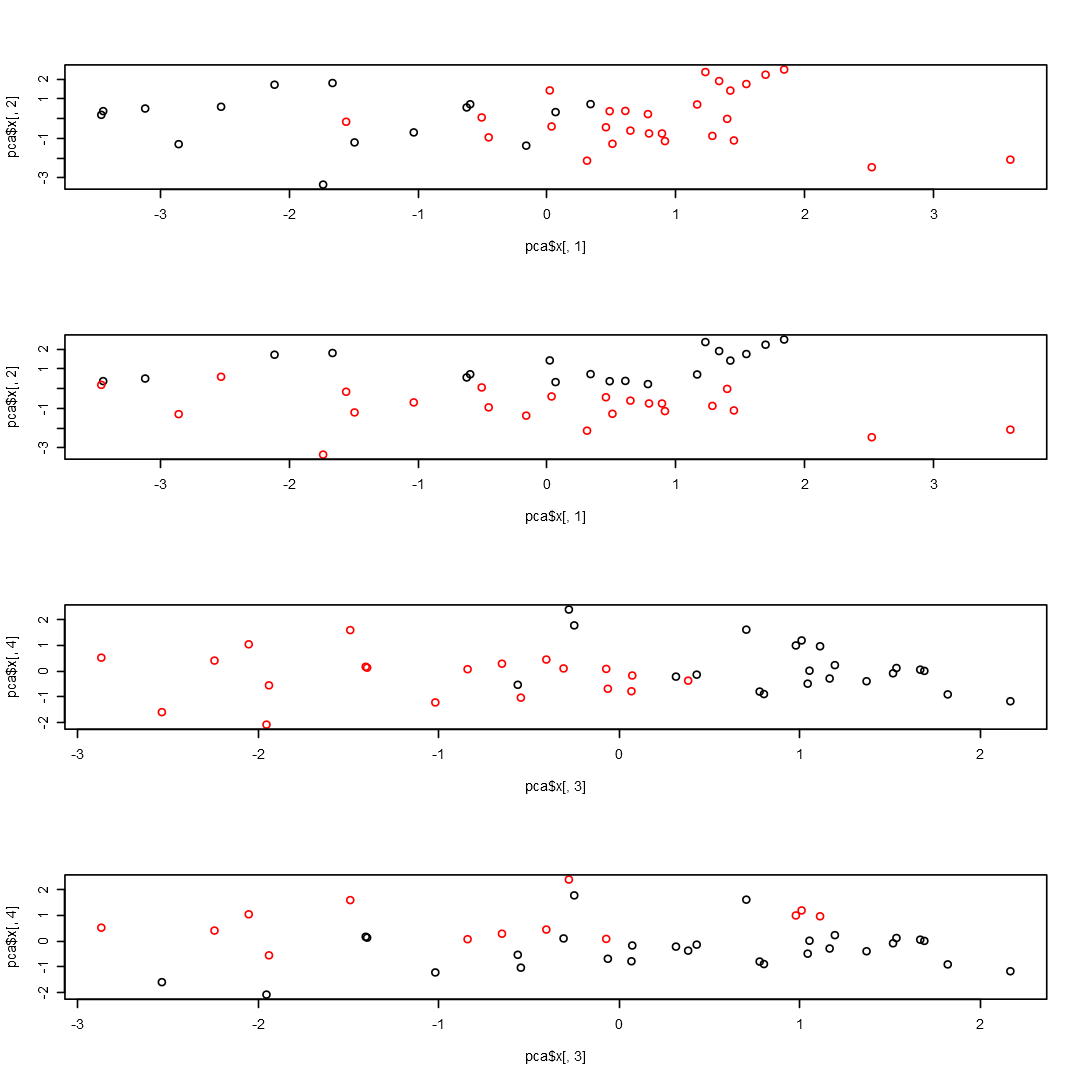

In [130]:
options(repr.plot.width=9, repr.plot.height=9)
par(mfrow=c(4,1))
tmp <- Cereal_s2
tmp$shape <- ifelse(tmp$Fiber >1.54,1,2) 
plot(pca$x[,1],pca$x[,2], col=tmp$shape)
tmp$shape <- ifelse(tmp$Carbon >14.4,1,2) 
plot(pca$x[,1],pca$x[,2], col=tmp$shape)
tmp$shape <- ifelse(tmp$Sugar >7.6,1,2) 
plot(pca$x[,3],pca$x[,4], col=tmp$shape)
tmp$shape <- ifelse(tmp$Fat >0.97,1,2) 
plot(pca$x[,3],pca$x[,4], col=tmp$shape)

 - iii.	이상치가 있는가? 있다면 어떤 성질을 가지는가? 
  - 존재한다 AllBran
  - 다이어트용 시리얼 같은 구성을 가지고 있다. 
  - 섬유소, 칼륨, 나트륨, 단백질 함량이 높고 설탕, 지방, 탄수화물, 함량이 낮아 칼로리가 낮은 모양을 하고 있다.

In [132]:
Cereal_s[Cereal_s$Fiber > 8, ]
which(Cereal_s$Fiber > 8)

,Manufacturer,Calories,Protein,Fat,Sodium,Fiber,Carbon,Sugar,Potassium
AllBran,K,70,4,1,260,9,7,5,320


[1] 18

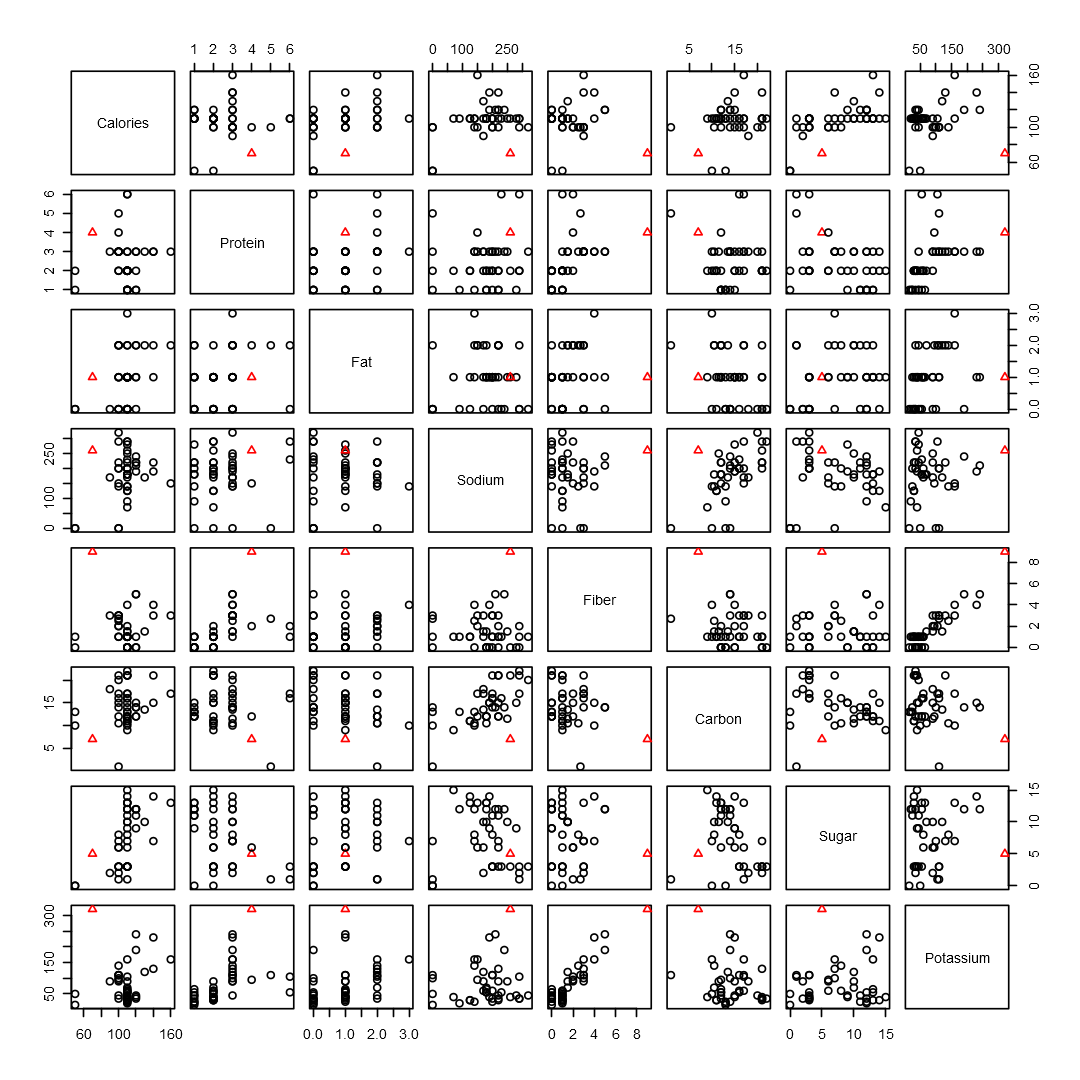

In [133]:
clr=rep(1,dim(Cereal_s)[1])
clr[18]=2
pairs(Cereal_s[,-1],col=clr,pch=clr)

 - iv.	주성분 분석의 결과를 활용하여 볼 때 각 제조사가 생산하는 시리얼 별로 영양성분 상의 특성이 다른가?
  - 아래의 결과를 확인함과 같이 각 제조사별로 주성분별 평균적으로 사용된 값들이 차이가 확연히 난다. 

In [138]:
describeBy(pca$x[,1:4],group=Cereal_s2[,1])

INDICES: G
    vars  n  mean   sd median trimmed  mad   min  max range  skew kurtosis   se
PC1    1 17 -0.13 1.35   0.07   -0.01 1.22 -3.44 1.42  4.86 -0.75    -0.27 0.33
PC2    2 17  0.18 0.96   0.33    0.16 1.39 -1.20 1.91  3.11  0.30    -1.15 0.23
PC3    3 17  0.28 1.12   0.43    0.34 1.09 -1.95 1.69  3.64 -0.50    -0.97 0.27
PC4    4 17 -0.28 0.74  -0.21   -0.29 0.47 -2.08 1.61  3.69  0.11     1.68 0.18
------------------------------------------------------------ 
INDICES: K
    vars  n  mean   sd median trimmed  mad   min  max range  skew kurtosis   se
PC1    1 19 -0.08 1.78   0.51    0.00 1.32 -3.46 1.84  5.30 -0.76    -1.05 0.41
PC2    2 19  0.34 1.42   0.39    0.35 2.02 -2.13 2.49  4.62 -0.04    -1.34 0.33
PC3    3 19 -0.01 1.09  -0.07    0.02 1.56 -2.05 1.54  3.59 -0.36    -1.08 0.25
PC4    4 19  0.46 0.88   0.24    0.43 1.07 -1.03 2.40  3.43  0.44    -0.69 0.20
------------------------------------------------------------ 
INDICES: Q
    vars n  mean   sd median trimmed  mad  

# 2. Psych package 안에 포함되어 있는 Thurstone.33 데이터셋은 4175명의 학생의 인지능력 테스트로부터 계산된 상관계수 행렬이다. 

 - A. 이 데이터를 사용하여 요인분석을 진행하여 9개의 테스트 결과에 영향을 주는 잠재요인을 파악하시오. (적절한 요인 개수와 요인회전 고려) 

In [4]:
thur <- Thurstone.33
str(thur)

'data.frame':	9 obs. of  9 variables:
 $ Definitions             : num  1 0.482 0.617 0.518 0.625 ...
 $ Arithmetical_Problems   : num  0.482 1 0.397 0.397 0.41 ...
 $ Classification          : num  0.617 0.397 1 0.472 0.626 ...
 $ Artificial_Languange    : num  0.518 0.397 0.472 1 0.52 ...
 $ Antonyms                : num  0.625 0.41 0.626 0.52 1 ...
 $ Number_Series_Completion: num  0.422 0.592 0.356 0.44 0.322 ...
 $ Analogies               : num  0.584 0.398 0.593 0.541 0.591 ...
 $ Logical_Inference       : num  0.563 0.505 0.5 0.48 0.594 ...
 $ Paragraph_Reading       : num  0.586 0.44 0.557 0.403 0.763 ...


In [148]:
describe(thur)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
Definitions,1.00000000,9.00000000,0.59948889,0.16404743,0.58350000,0.59948889,0.06137964,0.42160000,1.00000000,0.57840000,1.41973597,1.13783487,0.05468248
Arithmetical_Problems,2.00000000,9.00000000,0.51350000,0.19381618,0.44040000,0.51350000,0.06390006,0.39660000,1.00000000,0.60340000,1.66951441,1.46840986,0.06460539
Classification,3.0000000,9.0000000,0.5688000,0.1874028,0.5570000,0.5688000,0.1025959,0.3561000,1.0000000,0.6439000,1.0905640,0.3879945,0.0624676
Artificial_Languange,4.00000000,9.00000000,0.53012222,0.18336754,0.47970000,0.53012222,0.05930400,0.39660000,1.00000000,0.60340000,1.77119586,1.85546095,0.06112251
Antonyms,5.00000000,9.00000000,0.60564444,0.19596964,0.59370000,0.60564444,0.10971240,0.32210000,1.00000000,0.67790000,0.50725528,-0.53167854,0.06532321
Number_Series_Completion,6.00000000,9.00000000,0.47266667,0.21392826,0.42160000,0.47266667,0.09711030,0.32210000,1.00000000,0.67790000,1.57773306,1.17898540,0.07130942
Analogies,7.00000000,9.00000000,0.57711111,0.18053787,0.58350000,0.57711111,0.06256572,0.36340000,1.00000000,0.63660000,1.13208670,0.67233857,0.06017929
Logical_Inference,8.00000000,9.00000000,0.58802222,0.16774977,0.56310000,0.58802222,0.09310728,0.42560000,1.00000000,0.57440000,1.48743298,1.17467872,0.05591659
Paragraph_Reading,9.00000000,9.00000000,0.58295556,0.20228768,0.55700000,0.58295556,0.17287116,0.33240000,1.00000000,0.66760000,0.72365081,-0.56452264,0.06742923


In [149]:
head(thur)

,Definitions,Arithmetical_Problems,Classification,Artificial_Languange,Antonyms,Number_Series_Completion,Analogies,Logical_Inference,Paragraph_Reading
Definitions,1.0000,0.4819,0.6170,0.5177,0.6249,0.4216,0.5835,0.5631,0.5857
Arithmetical_Problems,0.4819,1.0000,0.3973,0.3966,0.4105,0.5923,0.3976,0.5049,0.4404
Classification,0.6170,0.3973,1.0000,0.4722,0.6262,0.3561,0.5931,0.5003,0.5570
Artificial_Languange,0.5177,0.3966,0.4722,1.0000,0.5197,0.4405,0.5413,0.4797,0.4034
Antonyms,0.6249,0.4105,0.6262,0.5197,1.0000,0.3221,0.5909,0.5937,0.7628
Number_Series_Completion,0.4216,0.5923,0.3561,0.4405,0.3221,1.0000,0.3634,0.4256,0.3324


 - 탐색 결과 Factor 수는 3개 이하일 경우 p-value > 0.05

In [5]:
fa <- factanal(covmat = as.matrix(thur), factors=3) 
print(fa,digits=2,order=T)


Call:
factanal(factors = 3, covmat = as.matrix(thur))

Uniquenesses:
             Definitions    Arithmetical_Problems           Classification 
                    0.39                     0.41                     0.42 
    Artificial_Languange                 Antonyms Number_Series_Completion 
                    0.51                     0.28                     0.38 
               Analogies        Logical_Inference        Paragraph_Reading 
                    0.40                     0.44                     0.00 

Loadings:
                         Factor1 Factor2 Factor3
Definitions              0.62    0.33    0.34   
Arithmetical_Problems    0.26    0.22    0.68   
Classification           0.66    0.31    0.22   
Artificial_Languange     0.58    0.14    0.35   
Antonyms                 0.61    0.57    0.17   
Number_Series_Completion 0.23    0.10    0.74   
Analogies                0.69    0.27    0.25   
Logical_Inference        0.49    0.42    0.38   
Paragraph_Reading     

 - 하나의 원변수에 부하 값이 큰 인자 2개가 존재한다. Antonyms, Logical_Inference 에서 비슷한 2개의 영향도가 발견 
 - 사회 과학문제에서 총분산 60% 정도까지 포함 
 - 결과를 일반화 하는데 더 관심이 있다면 직교회전 사용 
 - 직교회전 전 하나의 원 변수에 부하 값이 큰 인자가 2개 이상 존재하는 경우

In [6]:
library(GPArotation)
library(psych)

In [13]:
fa2 <- factanal(covmat = as.matrix(thur), factors=3, rotation="Promax") 
print(fa2,digits=2,order=T)


Call:
factanal(factors = 3, covmat = as.matrix(thur), rotation = "Promax")

Uniquenesses:
             Definitions    Arithmetical_Problems           Classification 
                    0.39                     0.41                     0.42 
    Artificial_Languange                 Antonyms Number_Series_Completion 
                    0.51                     0.28                     0.38 
               Analogies        Logical_Inference        Paragraph_Reading 
                    0.40                     0.44                     0.00 

Loadings:
                         Factor1 Factor2 Factor3
Definitions               0.68                  
Arithmetical_Problems             0.73          
Classification            0.80                  
Artificial_Languange      0.69    0.16   -0.18  
Antonyms                  0.63   -0.12    0.36  
Number_Series_Completion          0.83          
Analogies                 0.85                  
Logical_Inference         0.41    0.22    0.23  
P

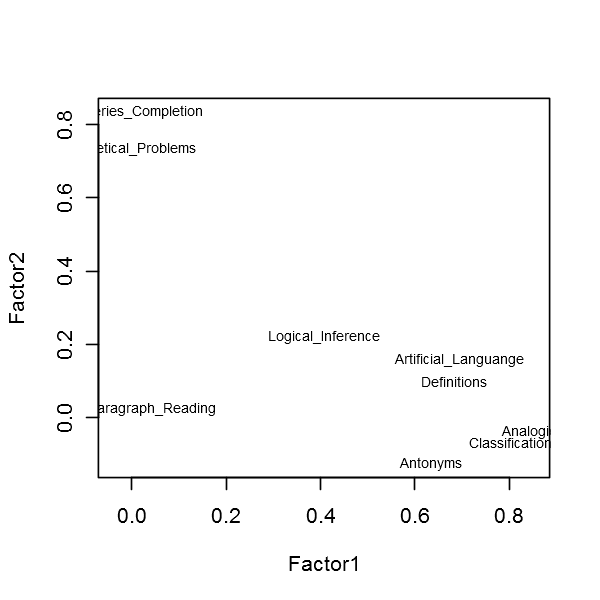

In [181]:
options(repr.plot.width=5,repr.plot.height=5)
s_load <- fa2$loadings
plot(s_load, type="n") # 점을 찍지 않으려고 type="n" none을 함.
text(s_load, labels=colnames(thur), cex=0.7)

- B.	잠재요인에 의해 가장 설명이 잘되는 원변수와 가장 설명이 안되는 원변수를 찾으시오. 
 - 가장 잘 설명해주는 변수 : Paragraph_Reading 개별인자의 값이 제일 작다.
 - 가장 설명을 못해주는 변수 : Artificial_Languange 개별인자의 값이 가장크다. 

In [183]:
fa2$uniquenesses

Definitions    Arithmetical_Problems           Classification 
               0.3896150                0.4119660                0.4199499 
    Artificial_Languange                 Antonyms Number_Series_Completion 
               0.5147419                0.2781807                0.3829876 
               Analogies        Logical_Inference        Paragraph_Reading 
               0.3969107                0.4367040                0.0050000

- C.	각 잠재요인이 데이터의 변동을 설명해 주는 비율을 계산하시오
 - Factor 1 : 0.32
 - Factor 2 : 0.148
 - Factor 3 : 0.127

In [191]:
fa2$loadings


Loadings:
                         Factor1 Factor2 Factor3
Definitions               0.683                 
Arithmetical_Problems             0.732         
Classification            0.803                 
Artificial_Languange      0.694   0.158  -0.182 
Antonyms                  0.633  -0.124   0.363 
Number_Series_Completion          0.833         
Analogies                 0.850                 
Logical_Inference         0.406   0.219   0.228 
Paragraph_Reading                         0.955 

               Factor1 Factor2 Factor3
SS loadings      2.884   1.334   1.146
Proportion Var   0.320   0.148   0.127
Cumulative Var   0.320   0.469   0.596